Checking whether the reconstructed time series and the observational time series have the same underlying disteributions overall

Tmax

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

All four plots together

Datasets and variable names

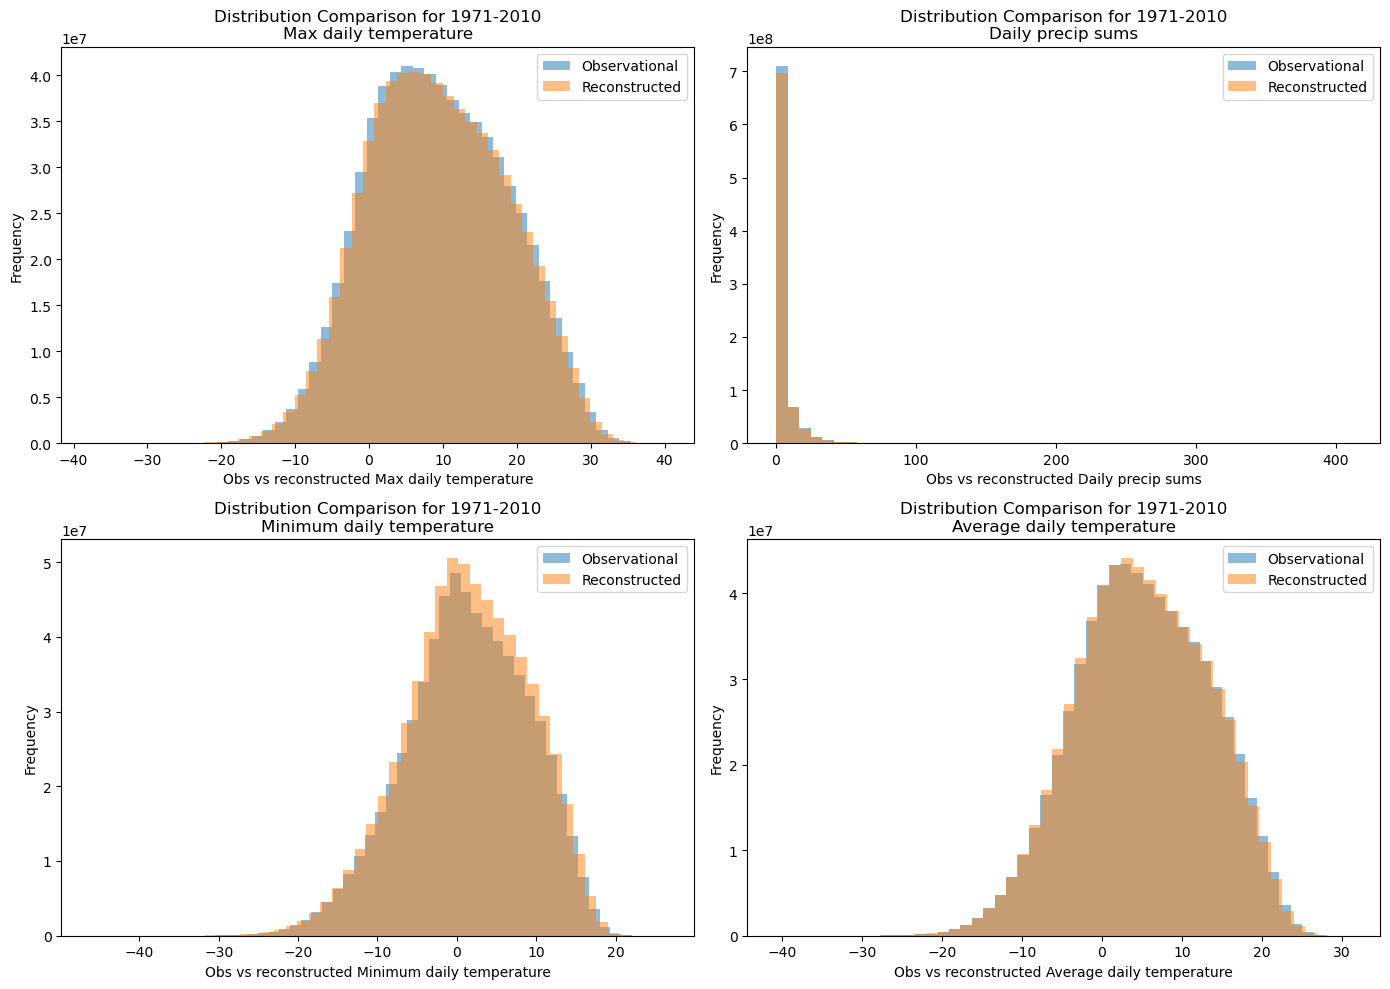

In [15]:
cases = [
    {
        "obs_path": "../data_1971_2023/HR_files_full/TmaxD_1971_2023.nc",
        "rec_path": "/work/FAC/FGSE/IDYST/tbeucler/downscaling/raw_data/Reconstruction_UniBern_1763_2020/tmax_1771_2010.nc",
        "obs_var": "TmaxD",
        "rec_var": "tmax",
        "title": "Max daily temperature"
    },
    {
        "obs_path": "../data_1971_2023/HR_files_full/RhiresD_1971_2023.nc",
        "rec_path": "/work/FAC/FGSE/IDYST/tbeucler/downscaling/raw_data/Reconstruction_UniBern_1763_2020/precip_1771_2010.nc",
        "obs_var": "RhiresD",
        "rec_var": "precip",
        "title": "Daily precip sums"
    },
    {
        "obs_path": "../data_1971_2023/HR_files_full/TminD_1971_2023.nc",
        "rec_path": "/work/FAC/FGSE/IDYST/tbeucler/downscaling/raw_data/Reconstruction_UniBern_1763_2020/tmin_1771_2010.nc",
        "obs_var": "TminD",
        "rec_var": "tmin",
        "title": "Minimum daily temperature"
    },
    {
        "obs_path": "../data_1971_2023/HR_files_full/TabsD_1971_2023.nc",
        "rec_path": "/work/FAC/FGSE/IDYST/tbeucler/downscaling/raw_data/Reconstruction_UniBern_1763_2020/temp_1771_2010.nc",
        "obs_var": "TabsD",
        "rec_var": "temp",
        "title": "Average daily temperature"
    }
]

years = range(1971, 2011)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, case in enumerate(cases):
    ds1 = xr.open_dataset(case["obs_path"], chunks={"time": 20})
    ds2 = xr.open_dataset(case["rec_path"], chunks={"time": 20})
    all_data1 = []
    all_data2 = []
    for year in years:
        d1 = ds1[case["obs_var"]].sel(time=slice(f'{year}-01-01', f'{year}-12-31')).values.flatten()
        d2 = ds2[case["rec_var"]].sel(time=slice(f'{year}-01-01', f'{year}-12-31')).values.flatten()
        d1 = d1[~np.isnan(d1)]
        d2 = d2[~np.isnan(d2)]
        all_data1.append(d1)
        all_data2.append(d2)
    data1_np = np.concatenate(all_data1)
    data2_np = np.concatenate(all_data2)
    axs[i].hist(data1_np, bins=50, alpha=0.5, label='Observational')
    axs[i].hist(data2_np, bins=50, alpha=0.5, label='Reconstructed')
    axs[i].set_title(f'Distribution Comparison for 1971-2010\n{case["title"]}')
    axs[i].set_xlabel(f"Obs vs reconstructed {case['title']}")
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.tight_layout()
plt.show()